<a href="https://colab.research.google.com/github/gaussssss/machinelearning-tpe/blob/main/Devoir_Machine_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charger les données IRIS avec scikit-learn

<h1>NoteBook de TPE d'apprentissage artificiel UY I Niveau 3 Info 2021/2022</h1>

<h3>Liste des membres du TPE</h3>
<ul>
  <li>MOMENE TIYA Florian <strong>21S2785</strong></li>
  <li>TEIDA NOUTSA Remi Raoul <strong>19M2447</strong></li>
  <li>MBOCK NYENGUE Anne Claude <strong>19M2211</strong></li>
  <li>EKOH FOUAPON NJIKAM Yvan <strong>19M2198</strong></li>
</ul>
<br>
<strong><i>Par Dr. Melatagia</i></strong>

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris() 

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
# On regarde ce qui est disponible pour ce type de donées
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
#On affiche les noms_cibles / target_names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
n_samples, n_features = iris.data.shape
print('Nombre d\'echantillons: ', n_samples)
print('Nombre de caractéristiques: ', n_features)

# la sepal length, sepal width, petal length et petal width du premier échantillon (première fleurs)
print(iris.data[0])

Nombre d'echantillons:  150
Nombre de caractéristiques:  4
[5.1 3.5 1.4 0.2]


In [ ]:
# fleurs avec les indinces 12, 26, 89, et 114
iris.data[[12, 26, 89, 114]]

array([[4.8, 3. , 1.4, 0.1],
       [5. , 3.4, 1.6, 0.4],
       [5.5, 2.5, 4. , 1.3],
       [5.8, 2.8, 5.1, 2.4]])

In [ ]:
#class 0: Iris Setosa
#class 1: Iris Versicolor
#class 2: Iris Virginica

print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import numpy as np

#Nbre d'échantillon pour chaque targets
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [ ]:
#On affiche le nom des targets
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


# Histogramme des caractéristiques

<ipython-input-28-79549c04f033>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


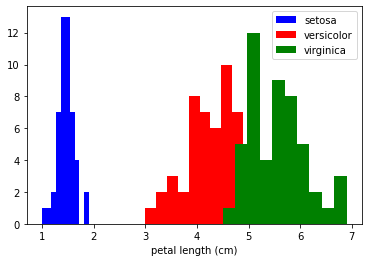

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_index = 2
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target==label, x_index],
            label=iris.target_names[label], 
            color=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
fig.show()

# (Nuages de point) SCATTERPLOT avec deux caractéristiques(features)

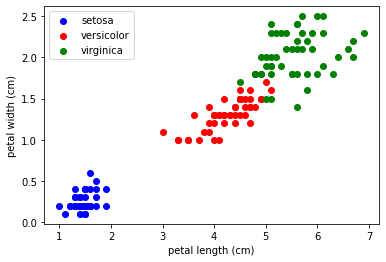

In [ ]:
fig, ax = plt.subplots()
x_index = 2
y_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.scatter(iris.data[iris.target==label, x_index],
               iris.data[iris.target==label, y_index],
               label=iris.target_names[label],
               c=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()

# Généralisation


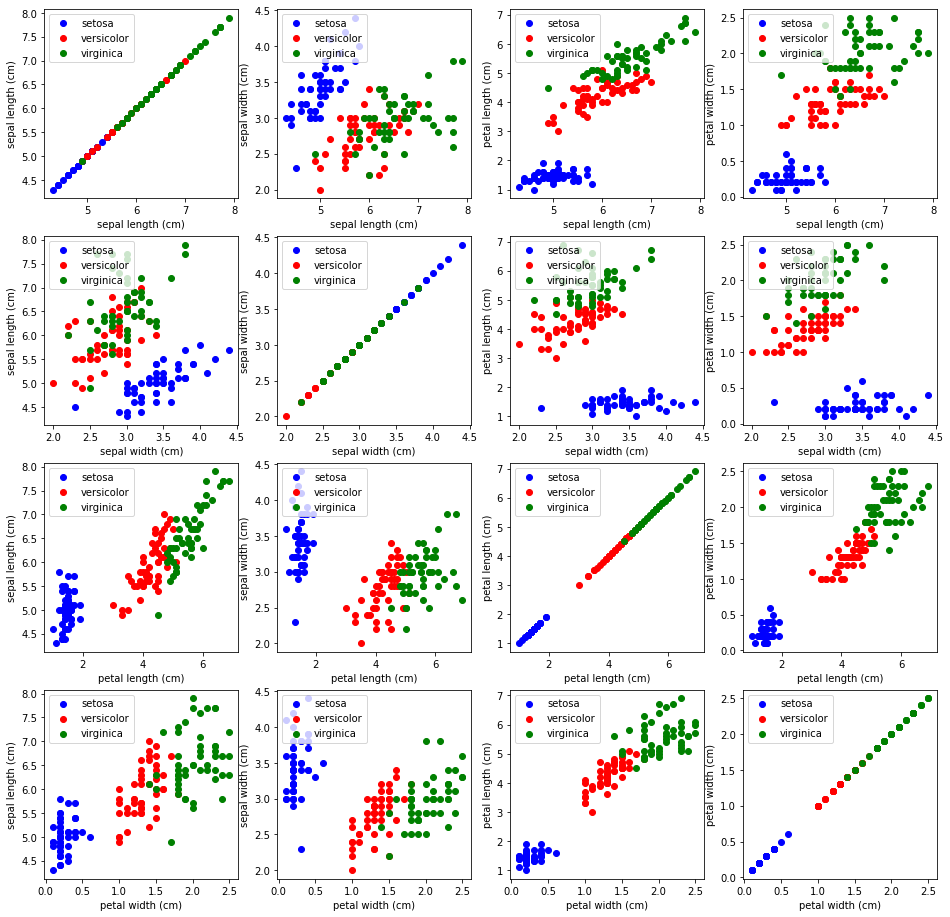

In [ ]:
n = len(iris.feature_names)
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green']

for x in range(n):
    for y in range(n):
        xname = iris.feature_names[x]
        yname = iris.feature_names[y]
        for color_ind in range(len(iris.target_names)):
            ax[x, y].scatter(iris.data[iris.target==color_ind, x],
                             iris.data[iris.target==color_ind, y],
                             label=iris.target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')
plt.show()

# Matrice de nuages de points

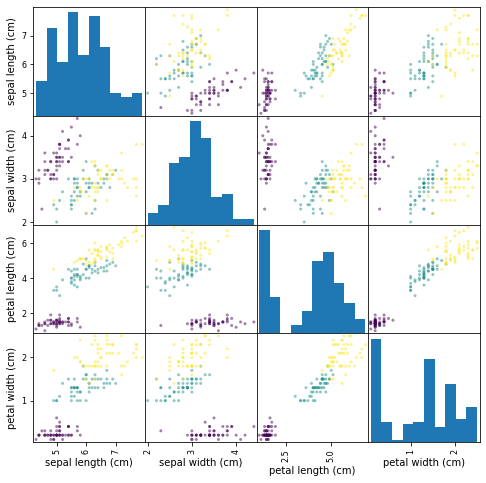

In [ ]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) 
pd.plotting.scatter_matrix(iris_df,
                           c=iris.target,
                           figsize=(8, 8)
                          );

# Visualisation en 3 dimensions

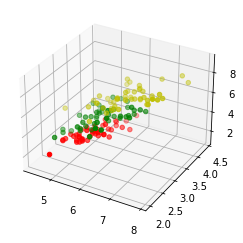

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(iris.data)):
        if iris.target[i] == iclass:
            X[iclass][0].append(iris.data[i][0])
            X[iclass][1].append(iris.data[i][1])
            X[iclass][2].append(sum(iris.data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

# Autres Donnéess disponibles

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [ ]:
print(digits.data[0])
print(digits.target)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


In [ ]:
print("Shape of an item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data tpye of an item: ", type(digits.images[0]))

Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data tpye of an item:  <class 'numpy.ndarray'>


Text(0, 7, '3')

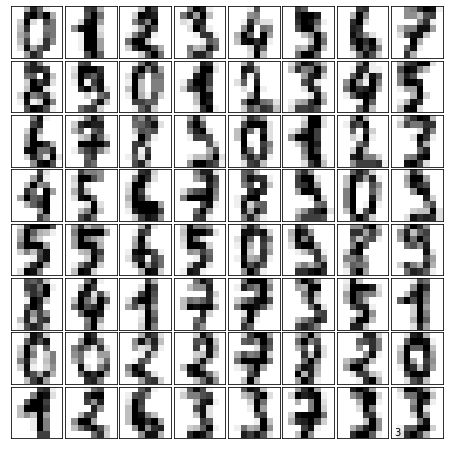

In [ ]:
# Mettre en place la figure

# tailles en inches(pouces)
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# tracer des chiffres: chaque image est 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

# On étiquette la figure avec les valeurs cibles
ax.text(0, 7, str(digits.target[i]))